In [3]:
import networkx as nx
import matplotlib.pyplot as plt 
from IPython.display import SVG, display

# README

## Figure 1

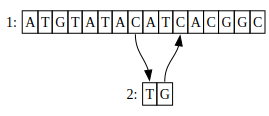

In [71]:
class BlockGraph:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_node(self, sequence):
        """
        Adds a node to the graph.

        Parameters:
        sequence (str): The sequence associated with a node. Note that in the actual gen code the sequence is hashed to save space.
        """
        node_id = self.graph.number_of_nodes() + 1
        self.graph.add_node(node_id, sequence=sequence)
        return node_id

    def add_edge(self, source, target):
        """
        Adds an edge to the graph with port information stored as edge attributes.

        Parameters:
        source (tuple): A tuple containing the source node and the position from which the edge departs.
        target (tuple): A tuple containing the target node and the position at which the edge arrives.
        """
        self.graph.add_edge(source[0], target[0], from_pos=source[1], to_pos=target[1])

    def render_graph(self, save_dot=None):
        # Create a copy of the graph to avoid modifying the original
        graph = self.graph.copy()
    
        for node in graph.nodes:
            # Break up the sequence into nucleotides and port markers for graphviz
            label = '\n'.join(f'<TD PORT="{i}">{c}</TD>' for i, c in enumerate(graph.nodes[node]['sequence']))
            # TODO: replace by html labels
            graph.nodes[node]['shape'] = 'none'
            graph.nodes[node]['margin'] = 0
            graph.nodes[node]['label'] = f"<<TABLE BORDER='0' CELLBORDER='1' CELLSPACING='0'><TR>"
            graph.nodes[node]['label'] += f"<TD BORDER='0'><FONT>{node}: </TD>"
            graph.nodes[node]['label'] += f"{label}</TR></TABLE>>"


            #graph.nodes[node]['label'] = label
            ## The record node type supports ported nodes
            #graph.nodes[node]['fontname'] = 'Courier'
            #graph.nodes[node]['label'] = f"node {node}:"

        for edge in graph.edges:
            # Connect the head and tail of each edge to the correct port
            graph.edges[edge]['headport'] = f"{graph.edges[edge]['to_pos']}"
            graph.edges[edge]['tailport'] = f"{graph.edges[edge]['from_pos']}"

        # Convert the networkx graph to a pygraphviz graph
        graph = nx.nx_agraph.to_agraph(graph)

        # Draw the graph using pygraphviz
        graph.layout(prog='dot', args='-Grankdir=TD -Gsplines=true -Goverlap=scale')
    
        if save_dot:
            # Save the graph as a dot file
            graph.write(save_dot)

        fig = SVG(graph.draw(prog='dot', format='svg'))


 

        display(fig)


G = BlockGraph()

n1 = G.add_node('ATGTATACATCACGGC')
n2 = G.add_node('TG')
G.add_edge((n1, 7), (n2, 0))
G.add_edge((n2, 1), (n1, 10))

G.render_graph('test.dot')


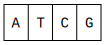

In [17]:
# >BBa_K1896001
# ATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTAGATGGTGATGTTAATGGGCACAAATTTTCTGTCAGTGGAGAGGGTGAAGGTGATGCAACATACGGAAAACTTACCCTTAAATTTATTTGCACTACTGGAAAACTACCTGTTCCATGGCCAACACTTGTCACTACTTTCTCTTATGGTGTTCAATGCTTTTCCCGTTATCCGGATCATATGAAACGGCATGACTTTTTCAAGAGTGCCATGCCCGAAGGTTATGTACAGGAACGCACTATATCTTTCAAAGATGACGGGAACTACAAGACGCGTGCTGAAGTCAAGTTTGAAGGTGATACCCTTGTTAATCGTATCGAGTTAAAAGGTATTGATTTTAAAGAAGATGGAAACATTCTCGGACACAAACTGGAGTACAACTATAACTCACACAATGTATACATCACGGCAGACAAACAAAAGAATGGAATCAAAGCTAACTTCAAAATTCGCCACAACATTGAAGATGGCTCCGTTCAACTAGCAGACCATTATCAACAAAATACTCCAATTGGTGATGGCCCTGTCCTTTTACCAGACAACCATTACCTGTCGACACAATCTAAACTTTTGAAAGATCCCAACGAAAAGCGTGACCACATGGTCCTTCTTGAGTTTGTAACTGCTGCTGGGATTACACATGGCATGGATGAGCTCTACAAATAA


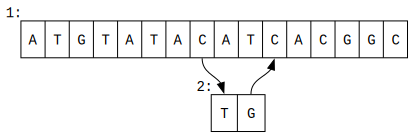

In [57]:
for n in foo.nodes_iter():
    node_pos = [float(s) for s in foo.get_node(n).attr['pos'].split(',')]
    caption_pos = [float(s) for s in foo.get_node(n).attr['xlp'].split(',')]
    caption_pos[0] = node_pos[0]
    foo.get_node(n).attr['xlp'] = f"{caption_pos[0]},{caption_pos[1]}"


foo.write('test.dot')



In [43]:
print(dir(foo))

['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_close_handle', '_draw', '_get_fh', '_get_prog', '_layout', '_manually_parse_args', '_owns_handle', '_prepare_nbunch', '_repr_mimebundle_', '_run_prog', '_svg_repr', '_update_handle_references', '_which', 'acyclic', 'add_cycle', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_path', 'add_subgraph', 'clear', 'close', 'copy', 'degree', 'degree_iter', 'delete_edge', 'delete_edges_from', 'delete_node', 'delete_nodes_from', 'delete_subgraph', 'directed', 'draw', 'edge_attr', 'edges', 'edges_iter', 'encoding', 'from_string', 'get_e